# **1. Perkenalan Dataset**


**Sumber Dataset**:  

Dataset ini diperoleh dari Kaggel:
[machine-predictive-maintenance-classification](https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification/data)


**Deskripsi Singkat**

Dataset ini berisi data operasional dan sensor yang disimulasikan dari peralatan manufaktur cerdas. Tujuan utama dataset ini adalah untuk membantu riset dalam pemeliharaan prediktif dan dukungan keputusan dengan memprioritaskan tindakan pemeliharaan berdasarkan risiko kegagalan teknis dan dampak operasional/bisnis. Dataset ini sangat cocok untuk diterapkan pada studi klasifikasi menggunakan algoritma machine learning.

**Informasi Umum**
*   **Jumlah Data (Baris): 10000**
*   **Jumlah Fitur (Kolom): 10**
*   **Jenis Analisis: Klasifikasi Multi-Kelas (Menentukan prioritas pemeliharaan: 1 = Tinggi, 2 = Sedang, 3 = Rendah)**


# **2. Import Library**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('predictive_maintenance_raw.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
df.columns.tolist()

['UDI',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'Failure Type']

**Distribusi Target**

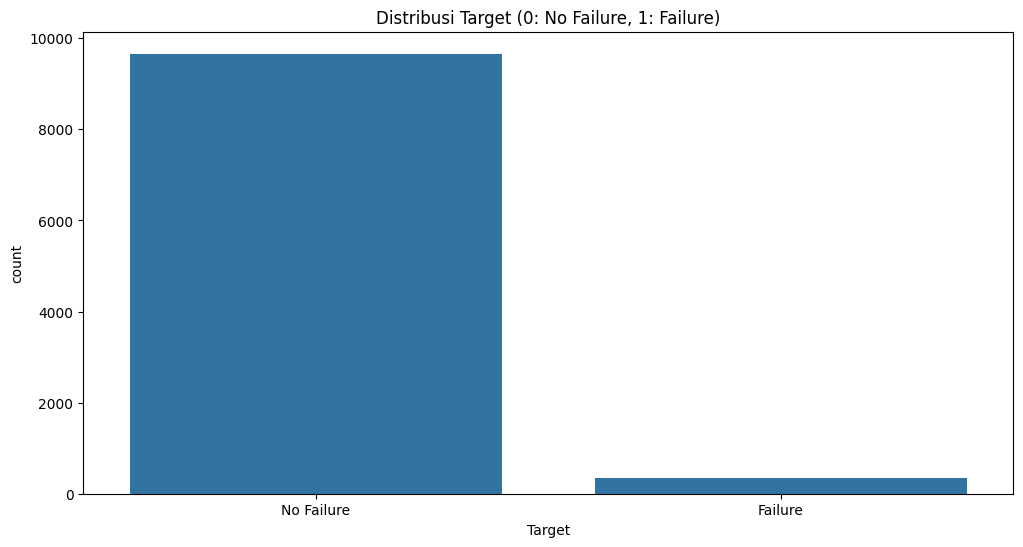

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Target', data=df)
plt.title('Distribusi Target (0: No Failure, 1: Failure)')
plt.xticks([0, 1], ['No Failure', 'Failure'])
plt.show()

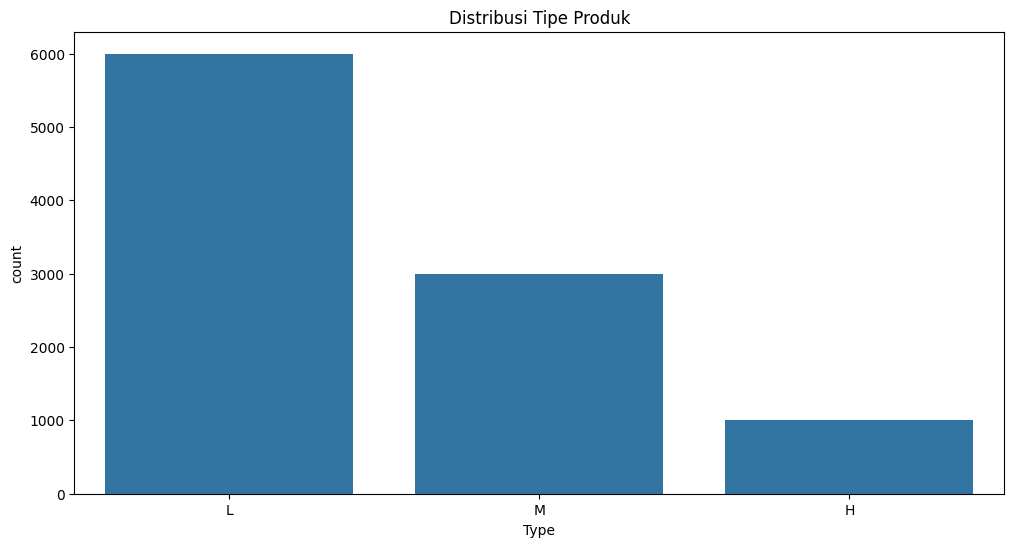

In [7]:
# Analisis Kolom 'Type'
plt.figure(figsize=(12, 6))
sns.countplot(x='Type', data=df, order=df['Type'].value_counts().index)
plt.title('Distribusi Tipe Produk')
plt.show()

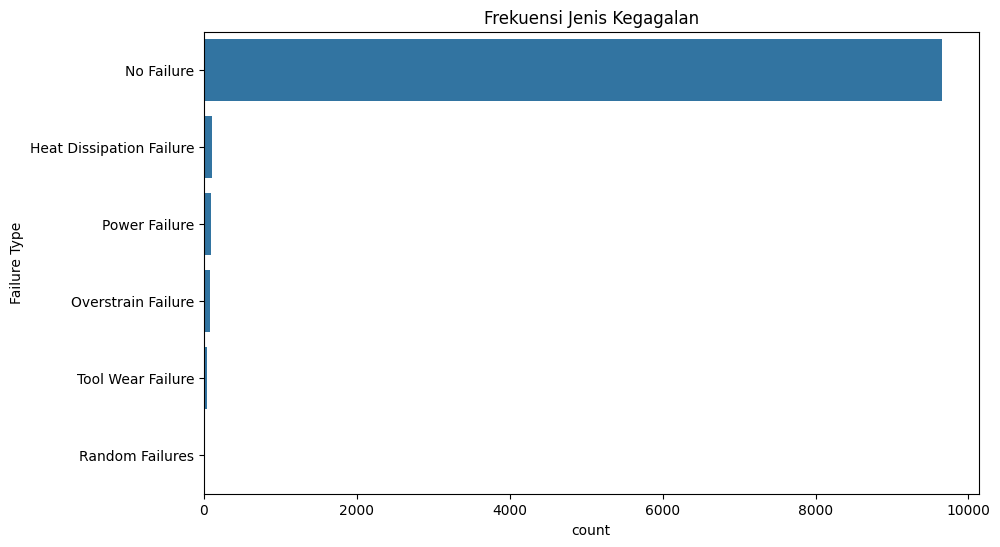

In [8]:
# Visualisasi Tipe Kegagalan
plt.figure(figsize=(10, 6))
sns.countplot(y='Failure Type', data=df, order=df['Failure Type'].value_counts().index)
plt.title('Frekuensi Jenis Kegagalan')
plt.show()

**Distribusi Sensor var Numerik**

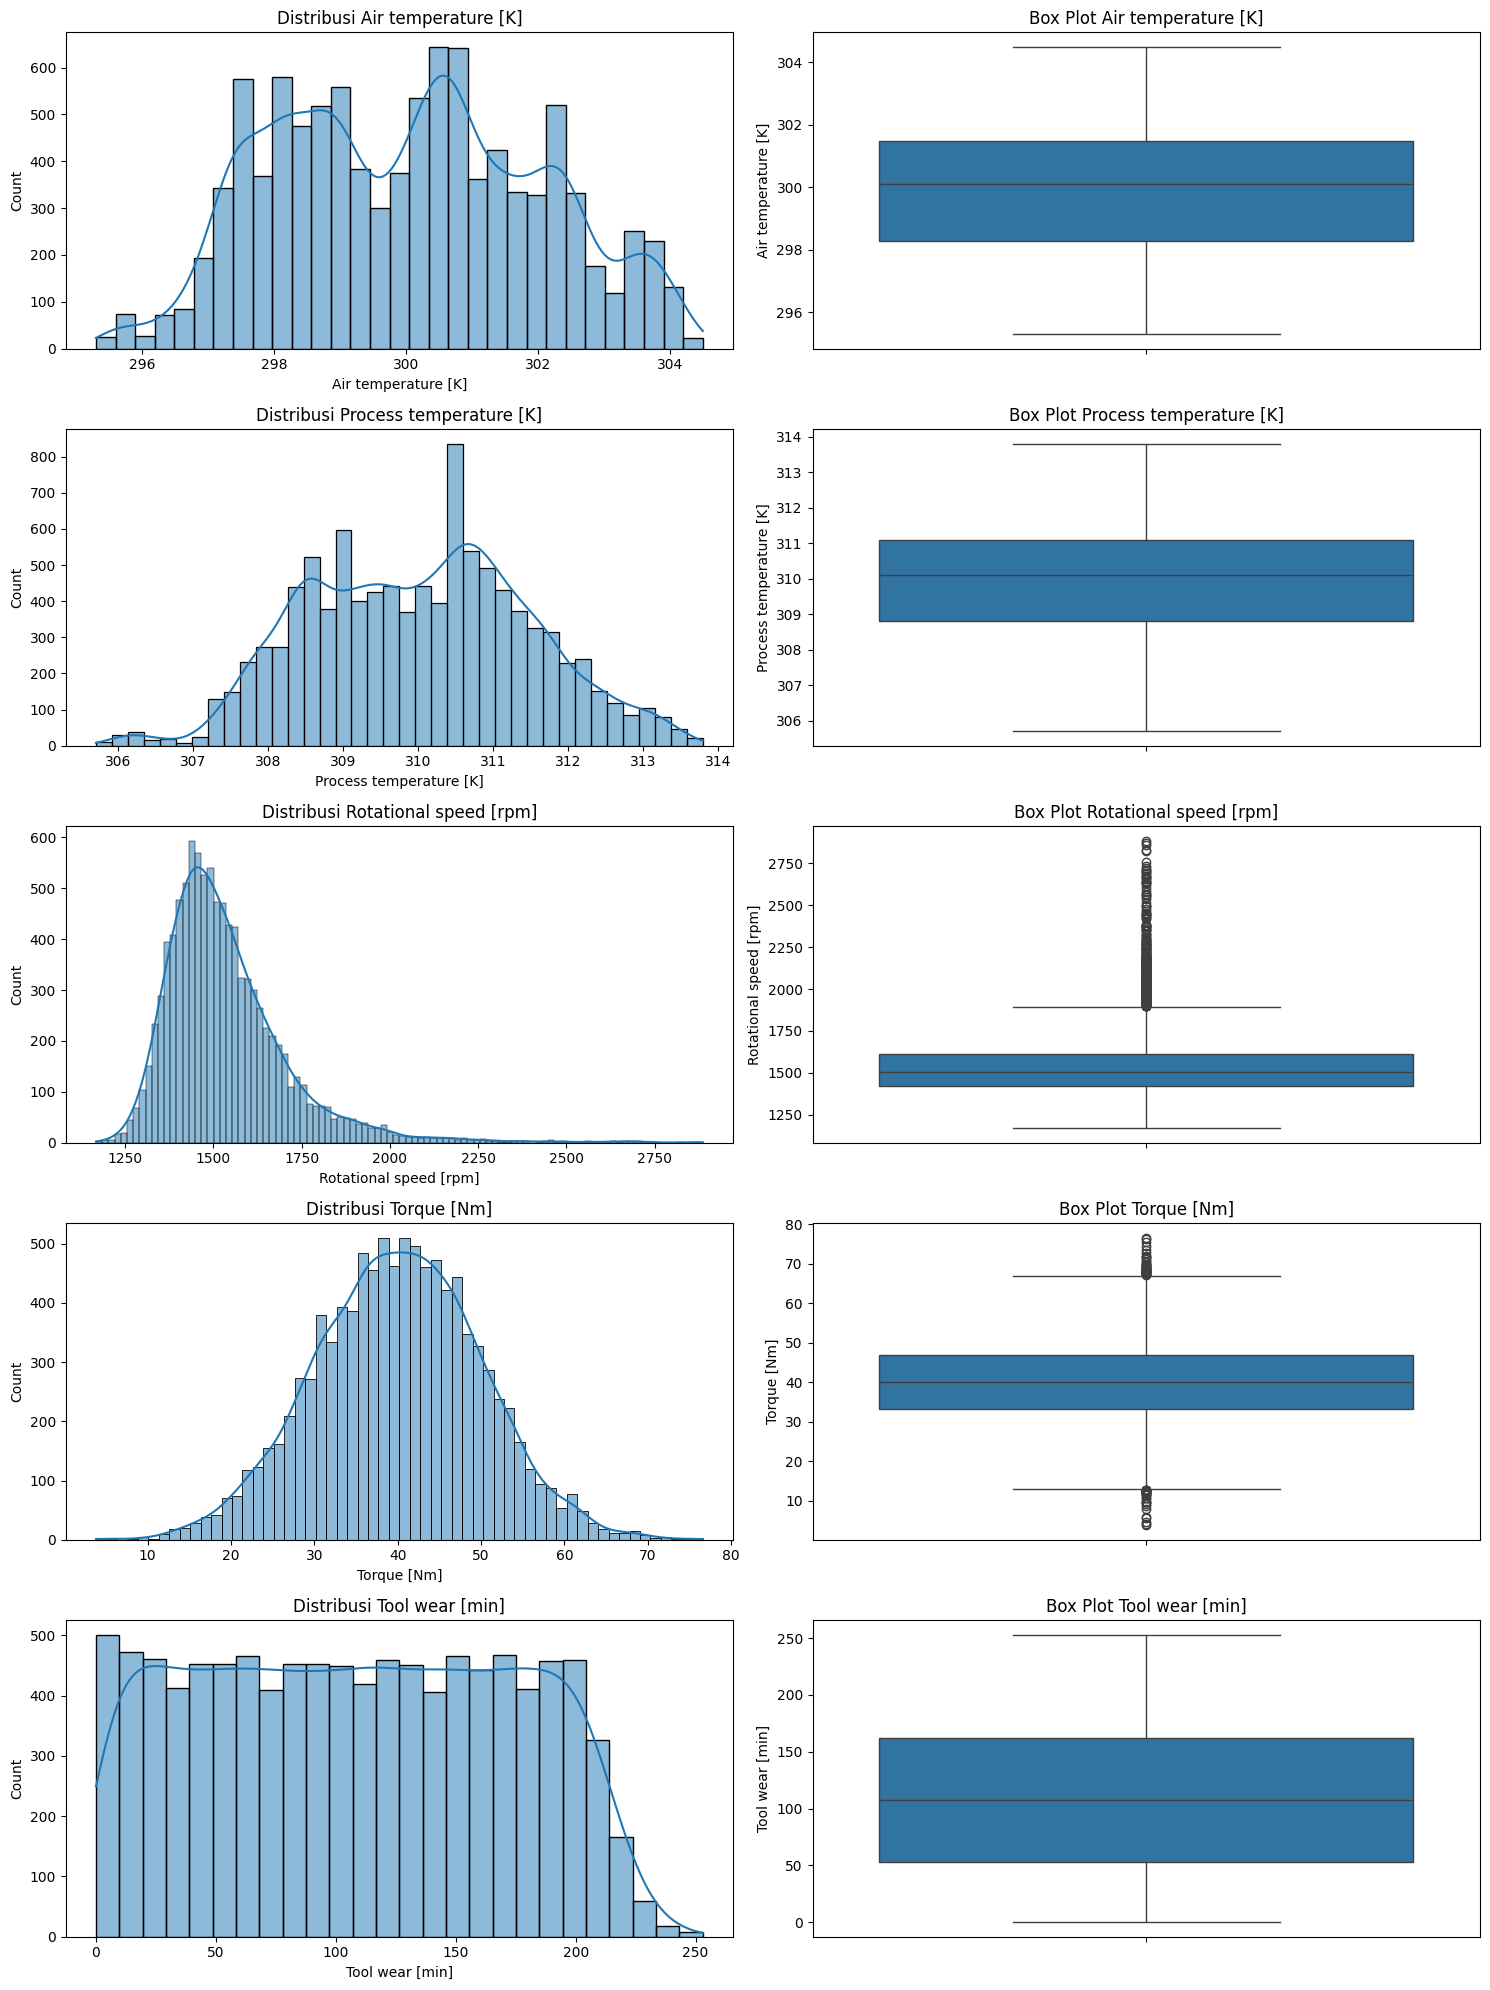

In [9]:
numerical_cols = ['Air temperature [K]', 'Process temperature [K]',
                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):

    plt.subplot(5, 2, 2*i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')

    plt.subplot(5, 2, 2*i + 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot {col}')

plt.tight_layout()
plt.show()

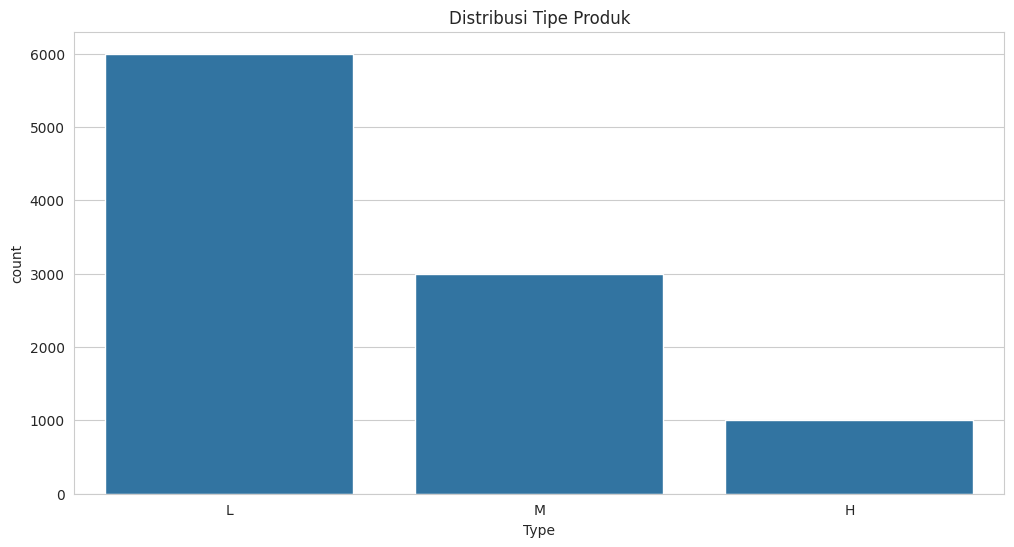

In [10]:
# Setel gaya visualisasi
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='Type', data=df, order=df['Type'].value_counts().index)
plt.title('Distribusi Tipe Produk')
plt.show()

**Korelasi Matriks**

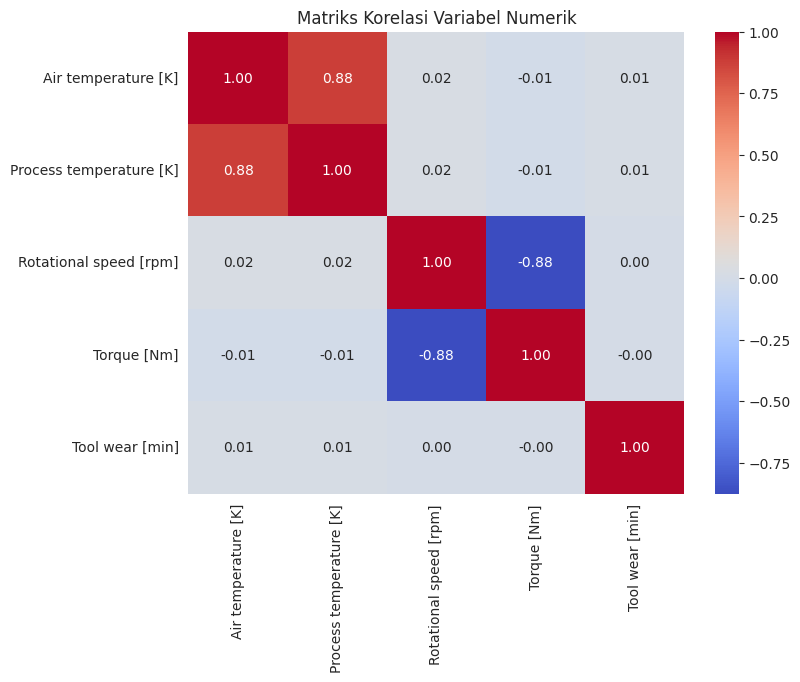

In [11]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

**Menangani Missing Values**

In [12]:
df.drop(columns=['UDI', 'Product ID'], inplace=True)
df.head(2)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure


In [13]:
df.isnull().sum()

,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


**Cek Duplicates Data**

In [14]:
df.duplicated().sum()

np.int64(0)

**Standarisasi atau Normalisasi**

In [15]:
print("=== Unique Values Per Column ===")
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

=== Unique Values Per Column ===
Type: 3 unique values
Air temperature [K]: 93 unique values
Process temperature [K]: 82 unique values
Rotational speed [rpm]: 941 unique values
Torque [Nm]: 577 unique values
Tool wear [min]: 246 unique values
Target: 2 unique values
Failure Type: 6 unique values


**Deteksi dan Penanganan Outlier**

--- Deteksi Outlier pada Kolom: Air temperature [K] ---
Q1: 298.30
Q3: 301.50
IQR: 3.20
Batas Bawah (Lower Bound): 293.50
Batas Atas (Upper Bound): 306.30


Jumlah Outlier yang Ditemukan: 0
Tidak ada Outlier yang terdeteksi.
--- Deteksi Outlier pada Kolom: Process temperature [K] ---
Q1: 308.80
Q3: 311.10
IQR: 2.30
Batas Bawah (Lower Bound): 305.35
Batas Atas (Upper Bound): 314.55


Jumlah Outlier yang Ditemukan: 0
Tidak ada Outlier yang terdeteksi.
--- Deteksi Outlier pada Kolom: Rotational speed [rpm] ---
Q1: 1423.00
Q3: 1612.00
IQR: 189.00
Batas Bawah (Lower Bound): 1139.50
Batas Atas (Upper Bound): 1895.50


Jumlah Outlier yang Ditemukan: 418
Data Outlier (5 baris pertama):
     Rotational speed [rpm]
14                     2035
50                     2861
70                     1924
101                    1991
155                    1987
--- Deteksi Outlier pada Kolom: Torque [Nm] ---
Q1: 33.20
Q3: 46.80
IQR: 13.60
Batas Bawah (Lower Bound): 12.80
Batas Atas (Upper Bound): 67.20



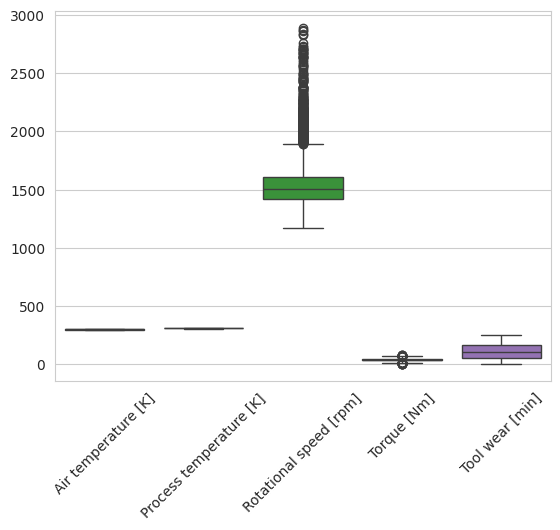

In [16]:
numeric_cols = ['Air temperature [K]',
                'Process temperature [K]',
                'Rotational speed [rpm]',
                'Torque [Nm]',
                'Tool wear [min]']

for col in numeric_cols:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1
    batas_bawah = Q1 - (1.5 * IQR)
    batas_atas = Q3 + (1.5 * IQR)

    outliers_data = df[(df[col] < batas_bawah) | (df[col] > batas_atas)]

    print("="*60)
    print(f"--- Deteksi Outlier pada Kolom: {col} ---")
    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Batas Bawah (Lower Bound): {batas_bawah:.2f}")
    print(f"Batas Atas (Upper Bound): {batas_atas:.2f}")
    print("\n")
    print(f"Jumlah Outlier yang Ditemukan: {len(outliers_data)}")

    if len(outliers_data) > 0:
        print("Data Outlier (5 baris pertama):")
        print(outliers_data[[col]].head())
    else:
        print("Tidak ada Outlier yang terdeteksi.")
print("="*60)
sns.boxplot(df[numerical_cols])
plt.xticks(rotation=45)
plt.show()

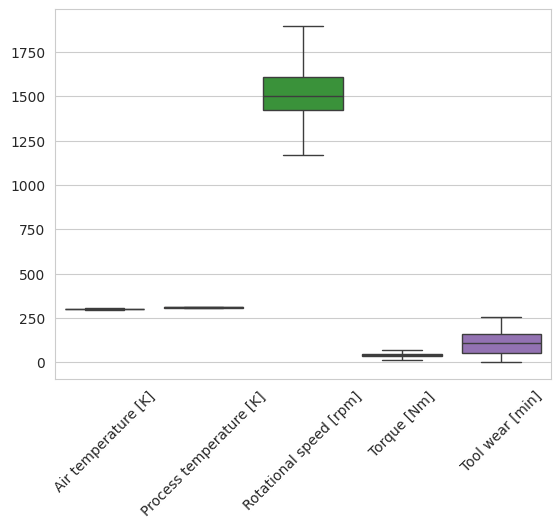

In [17]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_atas = Q3 + (1.5 * IQR)
    batas_bawah = Q1 - (1.5 * IQR)

    df[col] = np.where(df[col] > batas_atas, batas_atas, df[col])
    df[col] = np.where(df[col] < batas_bawah, batas_bawah, df[col])

sns.boxplot(df[numerical_cols])

plt.xticks(rotation=45)
plt.show()

**Normalisasi atau Standarisasi Fitur**

In [18]:
numeric_cols = ['Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]']

scaler = MinMaxScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,0.304348,0.358025,0.526460,0.551471,0.000000,0,No Failure
1,L,0.315217,0.370370,0.329897,0.615809,0.011858,0,No Failure
2,L,0.304348,0.345679,0.453608,0.672794,0.019763,0,No Failure
3,L,0.315217,0.358025,0.364261,0.490809,0.027668,0,No Failure
4,L,0.315217,0.370370,0.329897,0.500000,0.035573,0,No Failure


**ENCODING DATA KATEGORIKAL**

In [19]:
encoders = {}
categorical_cols = df.select_dtypes(exclude=['number']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,0.304348,0.358025,0.526460,0.551471,0.000000,0,1
1,1,0.315217,0.370370,0.329897,0.615809,0.011858,0,1
2,1,0.304348,0.345679,0.453608,0.672794,0.019763,0,1
3,1,0.315217,0.358025,0.364261,0.490809,0.027668,0,1
4,1,0.315217,0.370370,0.329897,0.500000,0.035573,0,1


**Pisahkan Fitur dan Label**

In [20]:
X = df.drop(columns=['Target', 'Failure Type'])

y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (8000, 6), Test shape: (2000, 6)


In [21]:
df.to_csv("Predictive_Maintenance_Preproces.csv", index=False)